In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("co2_emissions_kt_by_country.csv")

# Preview data
df.head()


,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [ ]:
# Informasi dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   year          13953 non-null  int64  
 3   value         13953 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 436.2+ KB


In [ ]:
# Missing values
df.isnull().sum()


,0
country_code,0
country_name,0
year,0
value,0


In [ ]:
# duplication check
df.duplicated().sum()


np.int64(0)

In [ ]:
#negative value check
df[df["value"]<0]


,country_code,country_name,year,value
11002,SEN,Senegal,1968,-80.674


In [ ]:
#2.
zero_emission_countries = (
    df
    .groupby('country_name')['value']
    .apply(lambda x: (x == 0).all())
    .reset_index(name='all_zero')
)

zero_emission_countries = zero_emission_countries[
    zero_emission_countries['all_zero']
]

zero_emission_countries

,country_name,all_zero


In [ ]:
#3 country name standarisation
df["country_name"] = df["country_name"].replace({
 "United States of America": "United States",
 "USA": "United States",
 "UK" : "United Kingdom",
 "Russian Federation": "Russia"
})


In [ ]:
#3. Eliminating countries with continuous zero emissions
 #number of years per country

year_count = (
    df.groupby('country_name')['year']
      .nunique()
      .reset_index(name='year_count')
)

 #country less than five years
countries_less_than_5_years = year_count[
    year_count['year_count'] < 5
]['country_name']

  #clean dataset
df_clean = df[~df['country_name'].isin(countries_less_than_5_years)]



In [ ]:
#4, increase of co2 emission percentage

import numpy as np

df['emission_category'] = np.where(
    df['value'] < 50000, 'low',
    np.where(
        df['value'] <= 300000, 'Medium', 'High'
    )
)

df['emission_category'].value_counts()

,count
emission_category,
low,8794
High,2819
Medium,2340


In [ ]:
#4. total emission per year
total_emissions_per_year = (
    df.groupby('year')['value']
      .sum()
      .reset_index(name='total_emissions')
)

total_emissions_per_year.head()

,year,total_emissions
0,1960,7.703980e+07
1,1961,7.630320e+07
2,1962,7.859003e+07
3,1963,8.311816e+07
4,1964,8.770606e+07


In [ ]:
#5, co2 emission analysis
avg_emissions_per_year = (
    df.groupby('year')['value']
      .mean()
      .reset_index(name='avg_emission_kt')
)

avg_emissions_per_year.head()

,year,avg_emission_kt
0,1960,379506.414474
1,1961,374035.311824
2,1962,381505.006340
3,1963,401537.009382
4,1964,411765.541760


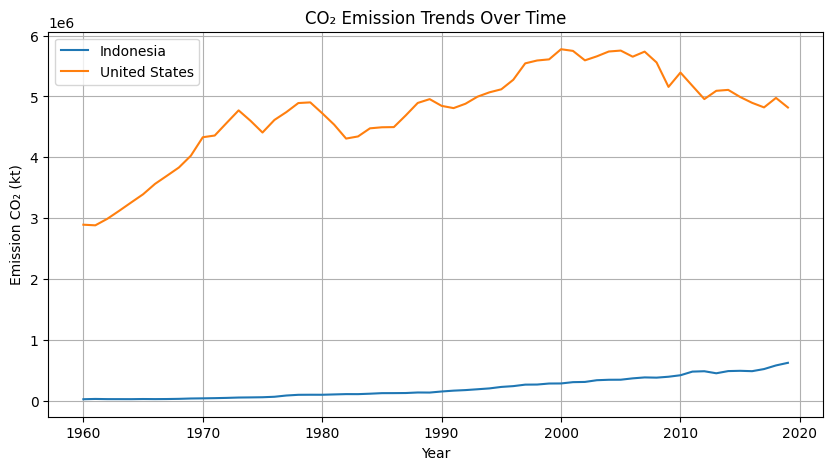

In [1]:
#6, comparing co2 emission time to time
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('co2_emissions_kt_by_country.csv')

# two countries filter indonesia and usa
countries = ['Indonesia', 'United States']
df_trend = df[df['country_name'].isin(countries)]

# data sorted
df_trend = df_trend.sort_values(['country_name', 'year'])

plt.figure(figsize=(10, 5))

for country in countries:
    country_data = df_trend[df_trend['country_name'] == country]
    plt.plot(
        country_data['year'],
        country_data['value'],
        label=country
    )

plt.title('CO₂ Emission Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Emission CO₂ (kt)')
plt.legend()
plt.grid(True)
plt.show()


CO₂ emission trends in Indonesia and the United States reveal distinct patterns shaped by their levels of economic development. In Indonesia, a developing country, emissions have generally increased over time. This growth is driven by rising energy consumption, industrialization, population growth, and continued reliance on fossil fuels, particularly coal. A temporary decline occurred around 2020, largely due to the COVID-19 pandemic, which disrupted industrial activity, transportation, and the overall economy. Following this period, emissions began to rise again as economic activity resumed.

In contrast, the United States, a developed country, exhibits a long-term pattern of stagnation and gradual decline in emissions. Early peaks were followed by reductions influenced by energy transitions from coal to natural gas and renewables, improved energy efficiency, stricter environmental regulations, and a shift from manufacturing to the service sector. Significant drops in emissions were observed during the 2008–2009 global financial crisis and in 2020 due to the pandemic. Unlike Indonesia, U.S. emissions did not return to previous peak levels, reflecting structural changes in the economy.

Overall, these trends indicate that developing countries often experience rising emissions alongside economic growth, whereas developed countries can achieve economic growth while reducing emissions through policy interventions and technological improvements. Global crises, such as the COVID-19 pandemic, have caused temporary declines in emissions across both contexts, but long-term trends are largely shaped by each country’s stage of development and energy strategy.

In [ ]:
#7, outlier anomali
import pandas as pd

# Load data
df = pd.read_csv('co2_emissions_kt_by_country.csv')

# Pastikan kolom value numerik
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Hapus nilai NaN
df = df.dropna(subset=['value'])


# DETEKSI OUTLIER (IQR)
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ambil data outlier
outliers = df[
    (df['value'] < lower_bound) |
    (df['value'] > upper_bound)
]

# Ambil satu outlier terbesar
if not outliers.empty:
    top_outlier = outliers.sort_values(by='value', ascending=False).iloc[0]
else:
    top_outlier = None

# Tandai outlier
df['is_outlier'] = (
    (df['value'] < lower_bound) |
    (df['value'] > upper_bound)
)

top_outlier

df.head()
df.dtypes
df['value'].isna().sum()



np.int64(0)